In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis

In [ ]:
data = pd.read_csv("data.csv", header=0, delimiter = ";")

In [ ]:
#Check data for 0s in dataset. 0 is a missed question


In [6]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P7,P8,P9,P10,age,gender,accuracy,country,source,elapsed
0,1,4,2,3,3,2,3,4,4,3,...,1,2,5,2,17,1,92,US,6,914.0
1,4,3,4,3,4,4,4,4,2,2,...,3,2,2,2,37,1,100,US,1,891.0
2,3,4,4,4,4,4,4,3,2,2,...,2,3,3,3,31,1,80,US,6,903.0
3,4,5,4,4,4,3,3,2,2,2,...,2,3,4,4,32,1,93,US,1,806.0
4,4,0,4,4,4,3,5,1,2,4,...,4,2,3,2,46,2,87,NZ,1,1826.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,24,1,100,IN,1,274.0
49155,4,5,4,4,4,3,5,3,2,3,...,3,4,4,4,22,1,50,ZA,1,584.0
49156,2,4,2,3,3,3,4,4,2,4,...,3,4,5,4,29,2,85,BE,6,932.0
49157,4,4,4,4,4,4,4,4,1,3,...,2,4,5,4,48,1,95,CZ,2,1212.0


In [ ]:
col_data = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10",
            "E1","E2","E3","E4","E5","E6","E7","E8","E9","E10",
            "H1","H2","H3","H4","H5","H6","H7","H8","H9","H10",
            "I1","I2","I3","I4","I5","I6","I7","I8","I9","I10",
            "N1","N2","N3","N4","N5","N6","N7","N8","N9","N10"]
X = data[col_data]




In [33]:
missing = X[X.eq(0).any(axis=1)]

In [ ]:
missing.shape()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10
2,3,4,4,4,4,4,4,3,2,2,...,4,4,5,4,4,5,4,3,4,1
4,4,0,4,4,4,3,5,1,2,4,...,3,3,4,4,5,4,5,4,4,2
8,2,4,2,5,5,4,5,4,2,2,...,2,2,4,2,4,4,4,0,4,4
27,4,4,4,5,4,3,4,2,1,2,...,3,3,4,3,4,0,4,4,4,2
34,5,4,4,4,5,3,5,3,2,3,...,2,2,4,3,5,5,5,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49139,4,4,4,5,4,4,4,1,1,1,...,3,3,4,4,4,4,0,3,5,2
49140,5,0,4,4,5,4,5,2,1,2,...,3,4,4,4,4,4,5,3,3,1
49148,5,5,5,4,3,5,5,2,2,1,...,4,4,5,5,5,5,4,4,4,2
49151,5,5,5,5,5,5,5,1,1,1,...,1,5,4,1,5,5,2,5,5,3


In [ ]:
warmth_col = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10"]
warmth = X[warmth_col]

dom_col = ["E1","E2","E3","E4","E5","E6","E7","E8","E9","E10"]
dominance = X[dom_col]

bold_col = ["H1","H2","H3","H4","H5","H6","H7","H8","H9","H10"]
boldness = X[bold_col]

sens_col = ["I1","I2","I3","I4","I5","I6","I7","I8","I9","I10"]
sensitivity  = X[sens_col]

priv_col = ["N1","N2","N3","N4","N5","N6","N7","N8","N9","N10"]
privateness  = X[priv_col]

In [ ]:
warmth

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,1,4,2,3,3,2,3,4,4,3
1,4,3,4,3,4,4,4,4,2,2
2,3,4,4,4,4,4,4,3,2,2
3,4,5,4,4,4,3,3,2,2,2
4,4,0,4,4,4,3,5,1,2,4
...,...,...,...,...,...,...,...,...,...,...
49154,1,1,1,1,1,1,1,1,1,1
49155,4,5,4,4,4,3,5,3,2,3
49156,2,4,2,3,3,3,4,4,2,4
49157,4,4,4,4,4,4,4,4,1,3


<Axes: >

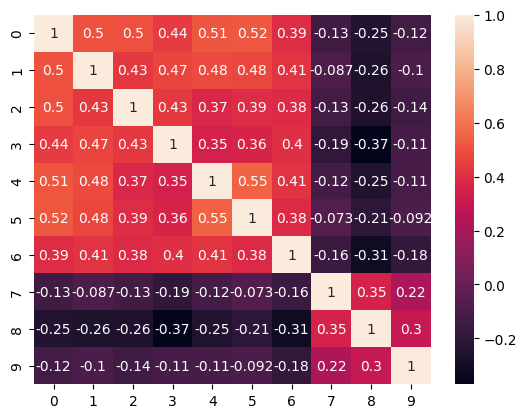

In [ ]:
corr = np.corrcoef(warmth, rowvar=False)
sns.heatmap(corr, annot=True)
#Questions 8,9,10 are asked in the negative sense, this explains the negative correlations

<Axes: >

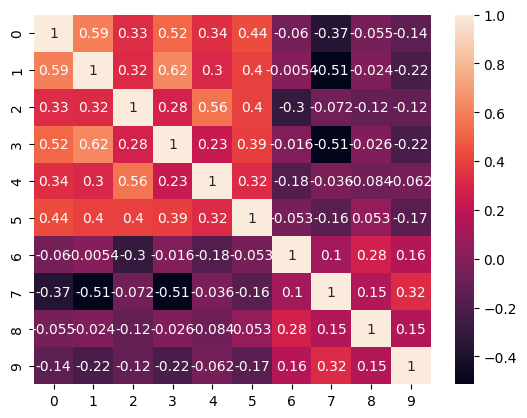

In [24]:
corr = np.corrcoef(dominance, rowvar=False)
sns.heatmap(corr, annot=True)

<Axes: >

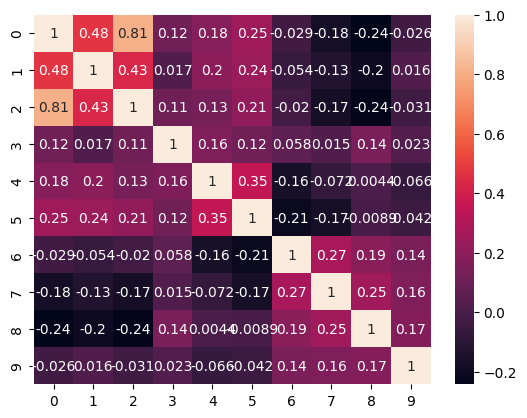

In [27]:
corr = np.corrcoef(boldness, rowvar=False)
sns.heatmap(corr, annot=True)

<Axes: >

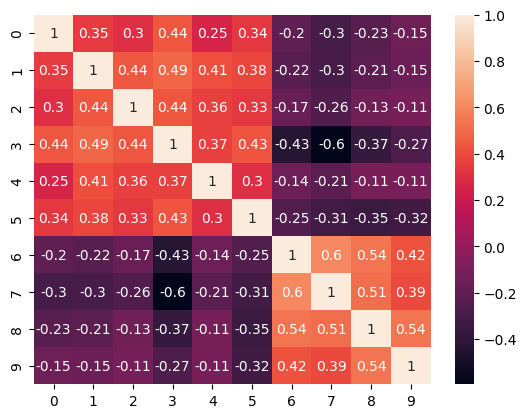

In [28]:
corr = np.corrcoef(sensitivity, rowvar=False)
sns.heatmap(corr, annot=True)

<Axes: >

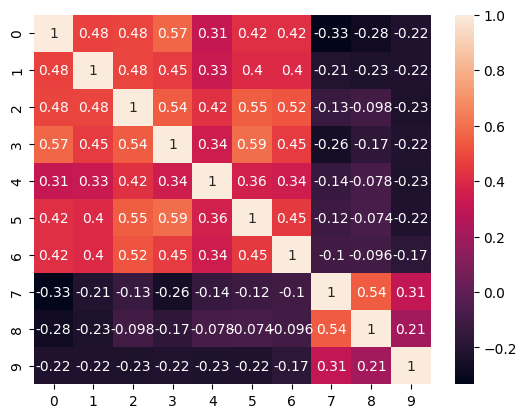

In [29]:
corr = np.corrcoef(privateness, rowvar=False)
sns.heatmap(corr, annot=True)

In [30]:
# Step 1: Standardize the data (mean centering)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis = 0)
#X_centered = X - X_mean

X_centered = (X - X_mean) / X_std

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

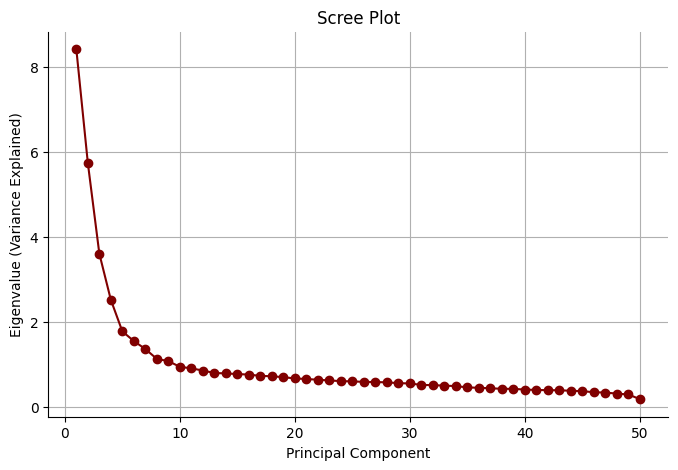

In [31]:
# Scree plot ("explained variance" by each principal component)
f, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o', linestyle='-', color="maroon")
ax.set_xlabel('Principal Component')
ax.set_ylabel('Eigenvalue (Variance Explained)')
ax.set_title('Scree Plot')
ax.grid(True)
sns.despine(ax=ax)